In [6]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import path as op
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/'

### Different sims, smae HOD, same HOD's seed:

### Same sim, same HOD, but changing HOD's seed:

In [7]:
import math
import re

def plot_corr_fixed_hod(corr_files, small_scale=True, save_fig=None):
    num_files = len(corr_files)
    m = math.ceil(math.sqrt(num_files))
    n = math.ceil(num_files / m)
    
    fig, axs = plt.subplots(m, n, figsize=(4*n, 4*m))
    if type(axs)!=np.ndarray:
        axs = np.array([axs])
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    for c, svf in enumerate(corr_files):
        if 'Box250_Part750' in svf:
            pref = 'L2'
        elif 'Box1000_Part3000' in svf:
            pref = 'HF'
        else:
            pref='L1'
        with h5py.File(svf, 'r') as f:
            r = f['r'][:]
            if f['corr'][:].ndim == 3:
                corr = np.mean(f['corr'][:], axis=2)
            else:
                corr = f['corr'][:]
            
        percent = np.percentile(corr, (16, 50, 84), axis=0)
        label = re.search(r'Part750_(\d+)', svf)
        if label is None:
            label = re.search(r'Part3000_(\d+)', svf)
        label= label.group(1)
        if small_scale:
            ind = r <= 60
            #for i in range(corr.shape[0]):
            #    axs[c].plot(r[ind], corr[i,ind], alpha=0.1)
            axs[c].scatter(r[ind], percent[1][ind], color='C0', s=1, marker='s')
            axs[c].fill_between(r[ind], percent[0][ind], percent[2][ind], color='k', alpha=0.4)

            axs[c].set_ylabel(r'$ w_p$')
            axs[c].set_xlabel(r'r [cMpc/h] ')
            axs[c].set_yscale('log')
            axs[c].set_xscale('log')
            axs[c].set_title(f'{pref} | Cosmo {label}')
        else:
            ind = r > 60
            for i in range(corr.shape[0]):
                axs[c].plot(r[ind], r[ind]**2 * corr[i,ind], alpha=0.1)
            axs[c].plot(r[ind], r[ind]**2 * percent[1][ind], color='k')
            axs[c].fill_between(r[ind], r[ind]**2 * percent[0][ind], r[ind]**2 * percent[2][ind], color='k', alpha=0.4)

            #axs[c].set_ylim((-0.1, 0.1))
            axs[c].set_ylabel(r'$r^2 \times \xi_0$')
            axs[c].set_xlabel(r'r [cMpc/h] ')
            axs[c].set_title(f'{pref} | Cosmo {label}')

    fig.tight_layout()
    if save_fig is not None:
        fig.savefig(save_fig)
        plt.close(fig)
        del fig
    else:
        plt.show()

### Even smaller scales:

l2 = 41


/home/qezlou/miniconda3/envs/het-cosmo/lib/python3.8/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


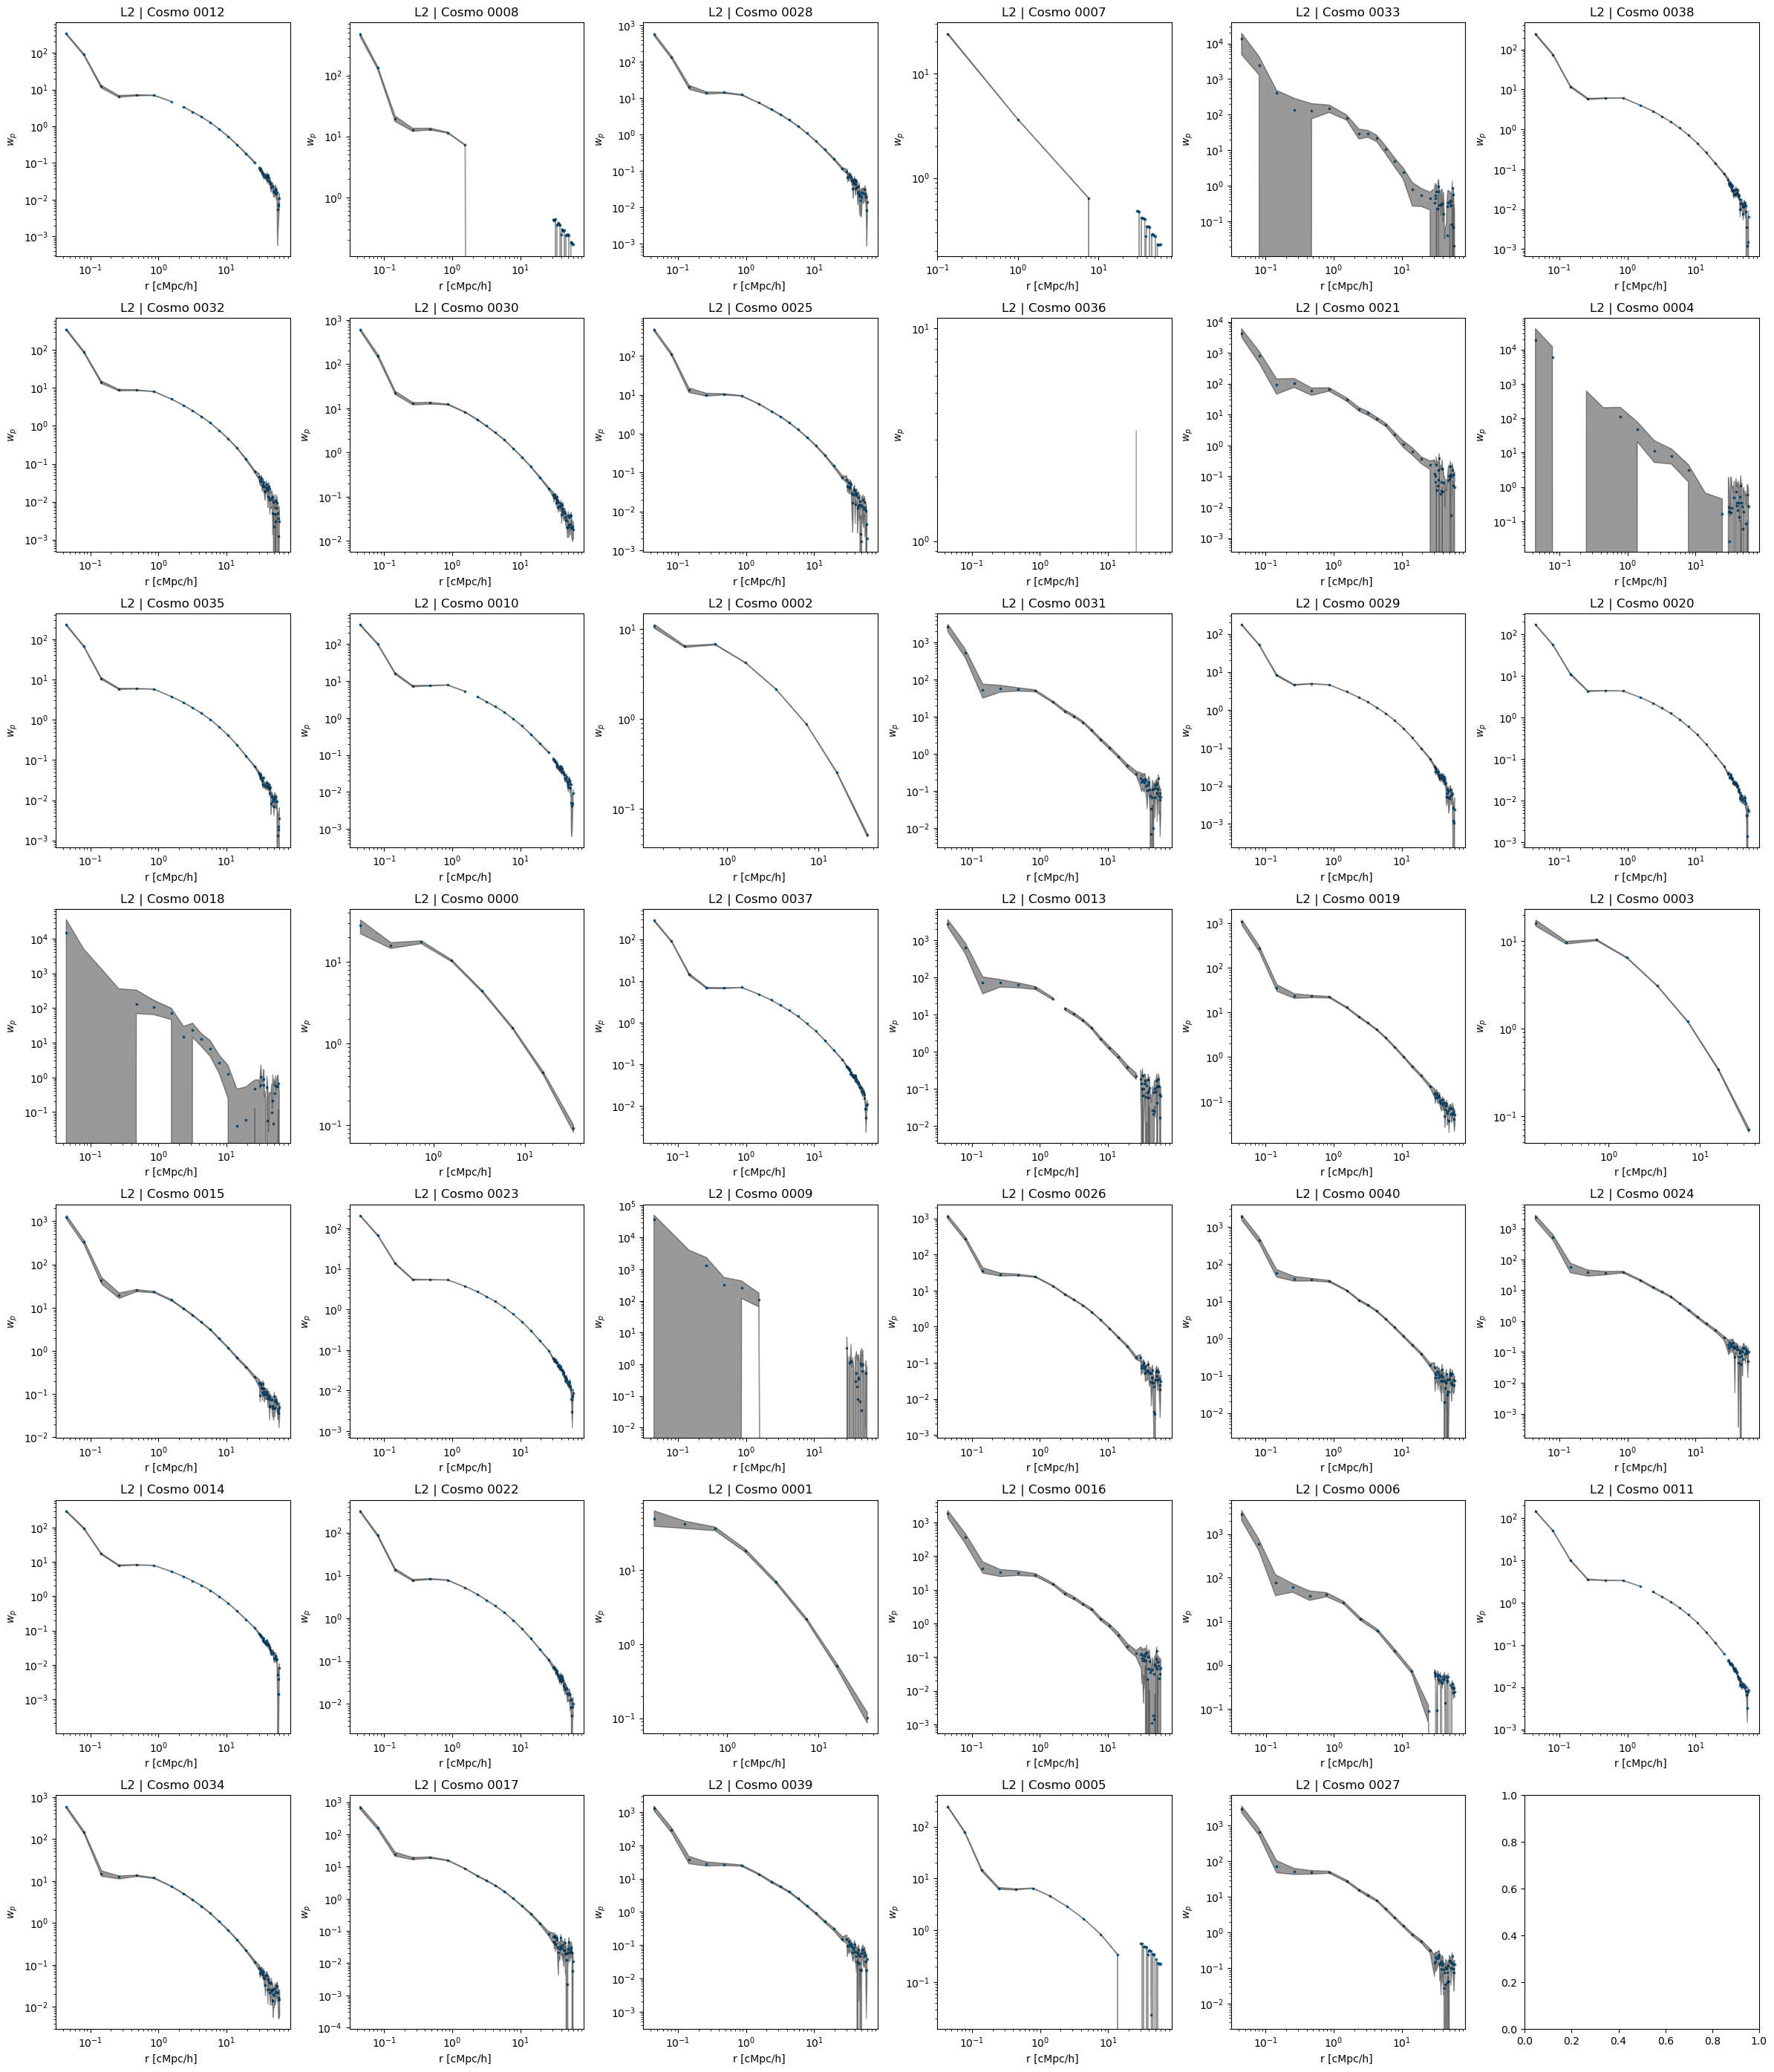

In [11]:
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corrs_smaller_scales/'

l2_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box250_Part750_*' ))

print(f'l2 = {len(l2_corrs)}')

plot_corr_fixed_hod(l2_corrs, small_scale=True, save_fig=None)

## FFTCorr:


Only monopole:

In [7]:
import h5py

with h5py.File(l2_corrs[0], 'r') as f:
    print(f['corr'][:])

[[ 4.80091134e+01  2.26075098e+01  8.64849010e+00 ...  4.27120403e-04
  -1.60675729e-03  6.41440049e-03]
 [ 4.28444250e+01  2.10208690e+01  8.38667328e+00 ... -8.03510117e-03
  -5.61055124e-03 -1.28827551e-03]
 [ 5.01293222e+01  2.22890920e+01  8.85190861e+00 ... -5.02955186e-03
  -6.03675605e-04  1.42343072e-03]
 ...
 [ 4.23718629e+01  2.08220110e+01  8.85132043e+00 ...  8.50315399e-03
   5.50562643e-03  2.87420048e-03]
 [ 5.22747803e+01  2.24039904e+01  7.54131210e+00 ... -4.84224892e-03
   3.48828658e-03  1.23949585e-02]
 [ 4.70588394e+01  2.10906069e+01  8.38901927e+00 ... -1.63577906e-06
  -1.37086490e-03  7.30698699e-03]]


['/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/Zheng07_seeds_cosmo_10p_Box250_Part750_0000.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/Zheng07_seeds_cosmo_10p_Box250_Part750_0001.hdf5']
l2 = 2
79


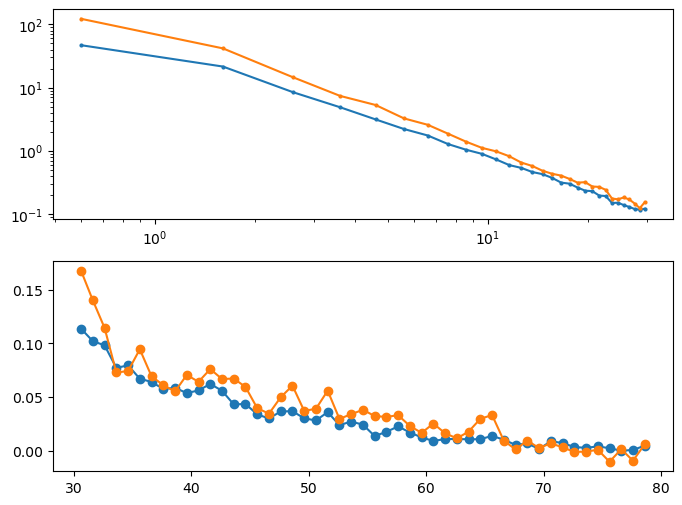

In [ ]:
l2_corrs = ['/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/Zheng07_seeds_cosmo_10p_Box250_Part750_0000.hdf5',
            '/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/Zheng07_seeds_cosmo_10p_Box250_Part750_0000.hdf5']

l2_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box250_Part750_*' ))
print(l2_corrs)
print(f'l2 = {len(l2_corrs)}')
(rmin, rmax, dr) = 0.1, 80, 1
r_edges = np.arange(rmin, rmax, dr)
r_bins = (r_edges[1:] + r_edges[:-1]) / 2
print(r_bins.size)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
for i in range(len(l2_corrs)):
    with h5py.File(l2_corrs[i], 'r') as f:
        corr = np.median(f['corr'], axis=0)
        ind =  r_bins < 30
        ax[0].plot(r_bins[ind], corr[ind], marker='o', markersize=2)
        ind = r_bins >= 30
        ax[1].plot(r_bins[ind], corr[ind], marker='o')

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')

## Same cosmo, different fidelity:

In [ ]:
import math
import re

def plot_compare_fids_fixed_hod(corr_files, small_scale=True, fig=None, ax=None):
    num_files = len(corr_files)
    m = math.ceil(math.sqrt(num_files))
    n = math.ceil(num_files / m)
    if fig is None:
        fig, ax = plt.subplots(2,1, figsize=(4,4), gridspec_kw={'height_ratios': [2, 1]})

    for c, svf in enumerate(corr_files):
        if 'Box250_Part750' in svf:
            pref = 'L2'
            color = 'C1'
            ls = 'dashed'
        elif 'Box1000_Part3000' in svf:
            pref = 'HF'
            color = 'C0'
            ls = 'solid'
        else:
            pref='L1'
            color = 'C2'
            ls = 'dotted'
        with h5py.File(svf, 'r') as f:
            r = f['r'][:]
            corr = f['corr'][:]
        percent = np.percentile(corr, (16, 50, 84), axis=0)
        label = re.search(r'Part750_(\d+)', svf)
        if label is None:
            label = re.search(r'Part3000_(\d+)', svf)
        label= label.group(1)
        if small_scale:
            ind = r <= 60
            #for i in range(corr.shape[0]):
            #    ax.plot(r[ind], corr[i,ind], alpha=0.1)
            ax[0].plot(r[ind], percent[1][ind], label=pref, ls=ls, lw=3, color=color)
            ax[1].plot(r[ind], percent[1][ind]/percent[1][ind], label=pref, ls=ls, lw=3, color=color)
            #ax.fill_between(r[ind], percent[0][ind], percent[2][ind], color='k', alpha=0.4)

            ax.set_ylabel(r'$ \xi_0$')
            ax.set_xlabel(r'r [cMpc/h] ')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_title(f'Cosmo {label}')
        else:
            ind = r > 60
            #for i in range(corr.shape[0]):
            #    ax.plot(r[ind], r[ind]**2 * corr[i,ind], alpha=0.1)
            ax.plot(r[ind], r[ind]**2 * percent[1][ind], label=pref, ls=ls, color=color)
            #ax.fill_between(r[ind], r[ind]**2 * percent[0][ind], r[ind]**2 * percent[2][ind], color='k', alpha=0.4)

            ax.set_ylim((0, 250))
            ax.set_ylabel(r'$r^2 \times \xi_0$')
            ax.set_xlabel(r'r [cMpc/h] ')
            ax.set_title(f'Cosmo {label}')

    fig.tight_layout()
    ax.legend()
    plt.show()
    return fig, ax

In [4]:
hf_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box1000_Part3000_*' ))
hf_corrs

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0024.hdf5',
 '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0072.hdf5',
 '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0026.hdf5',
 '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0522.hdf5']

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0024.hdf5']


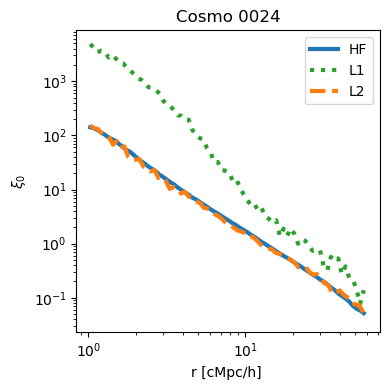

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0072.hdf5']


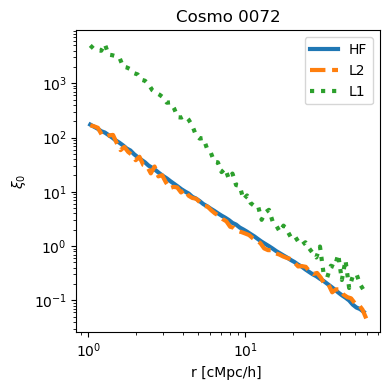

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0026.hdf5']


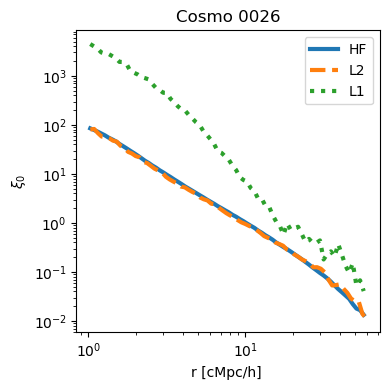

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0522.hdf5']


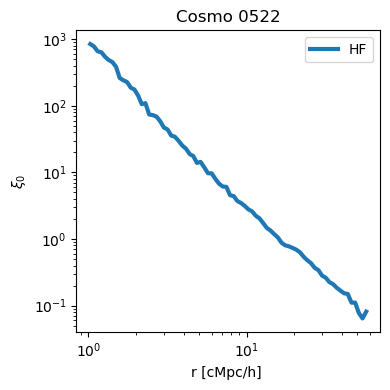

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0024.hdf5']


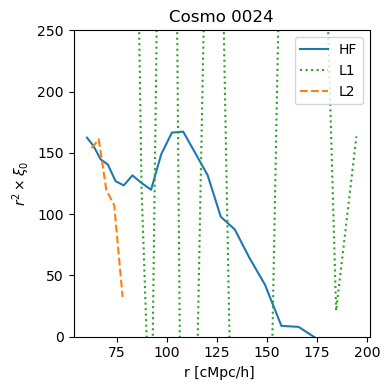

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0072.hdf5']


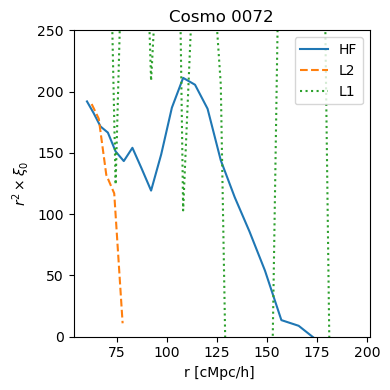

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box250_Part750_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part750_0026.hdf5']


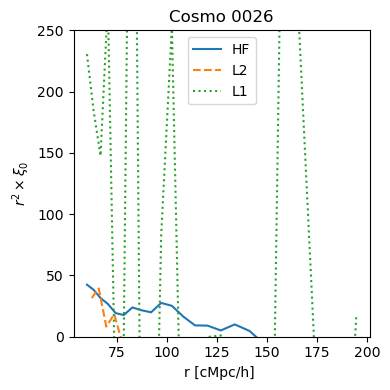

['/home/qezlou/HD2/HETDEX/cosmo/data/corrs/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0522.hdf5']


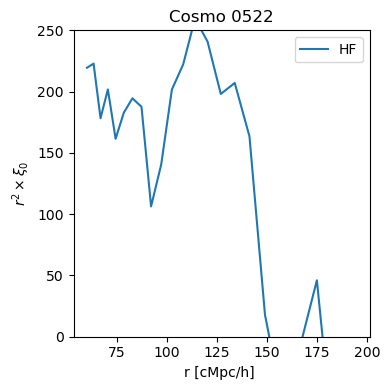

In [6]:
fig= None
ax=None
pattern = r'_(\d{4})\.hdf5'
hf_nums = [re.search(pattern, path).group(1) for path in hf_corrs]
for num in hf_nums:
    paired_sims = glob(op.join(save_dir, f'Zheng07_seeds_cosmo_10p_Box*_Part*_{num}*' ))
    print(paired_sims)
    plot_compare_fids_fixed_hod(paired_sims, small_scale=True, fig=fig, ax=ax)


fig= None
ax=None
pattern = r'_(\d{4})\.hdf5'
hf_nums = [re.search(pattern, path).group(1) for path in hf_corrs]
for num in hf_nums:
    paired_sims = glob(op.join(save_dir, f'Zheng07_seeds_cosmo_10p_Box*_Part*_{num}*' ))
    print(paired_sims)
    plot_compare_fids_fixed_hod(paired_sims, small_scale=False, fig=fig, ax=ax)

In [ ]:
import hmf

hmf = hmf.Hmf()
nums = ['0024', '0026', '0072']

for n in nums:
    pig_dirs = [f'/scratch/06536/qezlou/Goku/FOF/HF/cosmo_10p_Box1000_Part3000_{n}/output/PIG_003/',
                f'/scratch/06536/qezlou/Goku/FOF/L1/cosmo_10p_Box1000_Part750_{n}/output/PIG_003/',
                f'/scratch/06536/qezlou/Goku/FOF/L2/cosmo_10p_Box250_Part750_{n}/output/PIG_003/']
    vol = [1000**3, 1000**3, 250**3]
    labels = ['HF', 'L1', 'L2']
    fig, ax = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [2, 1]})
    for i in range(len(pig_dirs)):
        hist = hmf.get_fof_hmf(pig_dirs[i])
        ax[0].plot(hist[0], hist[1]/vol[i], label=labels[i])
        if labels[i] != 'HF':
            ax[1].plot(hist[0], (hist[1]/vol[i]) / (hist[1]/vol[0]), label=labels[i])

    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('FOF halo Mass')
    ax[0].set_ylabel('hmf [1/cMph^-3]')
    ax[1].set_ylabel('Ratio to HF')
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    
    ax.set_title(f'Cosmo {n}')
    ax.set_ylabel(f'hmf [1/cMph^-3]')
    ax.set_xlabel('FOF halo Mass')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()




### Cosmology dependance:

['/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0012.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0074.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0008.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0057.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0068.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0064.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0028.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0141.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0086.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250

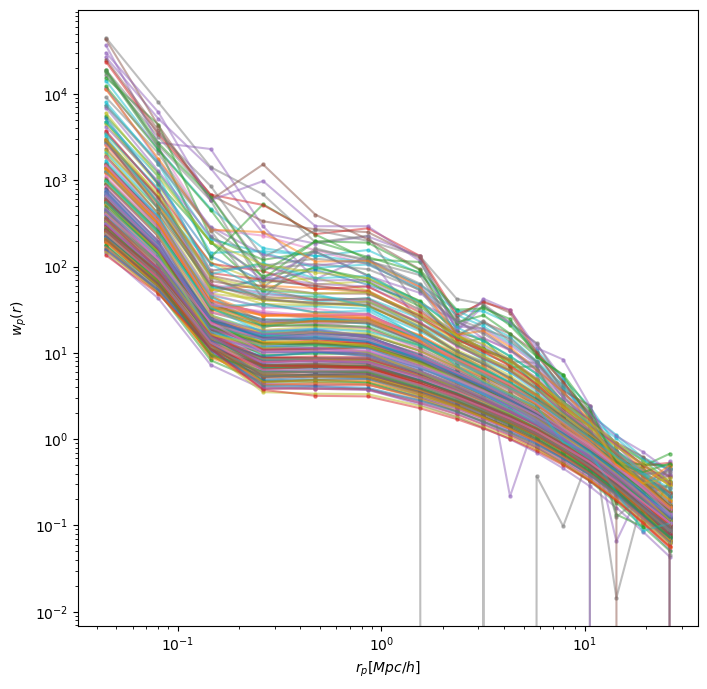

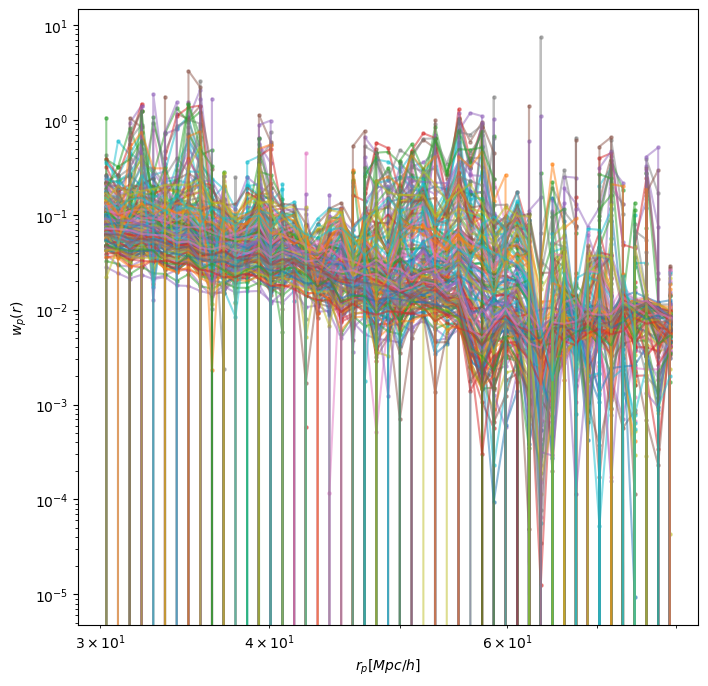

In [2]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/'

l2_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box250_Part750_*' ))
print(l2_corrs)
plot_corr.compare_cosmos(l2_corrs, savefig=None, r_range=(0, 30))
plot_corr.compare_cosmos(l2_corrs, savefig=None, r_range=(30, 80))

HF count : 16


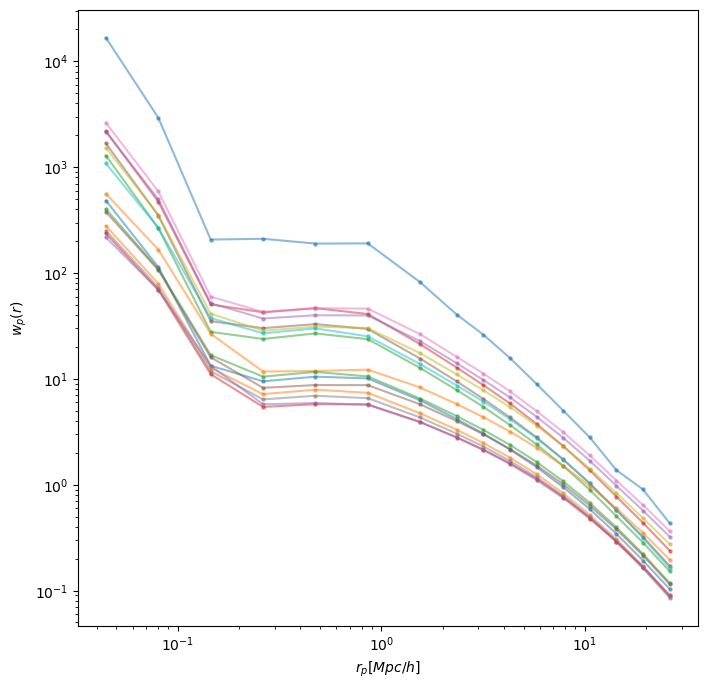

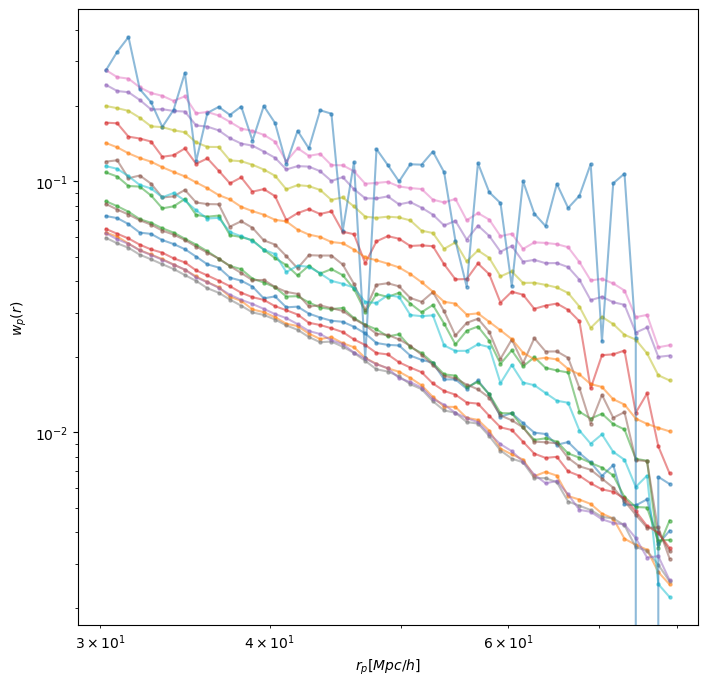

In [4]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

hf_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box1000_Part3000_*' ))
print(f'HF count : {len(hf_corrs)}')
plot_corr.compare_cosmos(hf_corrs, savefig=None, r_range=(0, 30))
plot_corr.compare_cosmos(hf_corrs, savefig=None, r_range=(30, 80))

## Compare fidelities:

(['/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0074.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box1000_Part3000_0073.hdf5'], ['/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0024.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0072.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0074.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0026.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cos

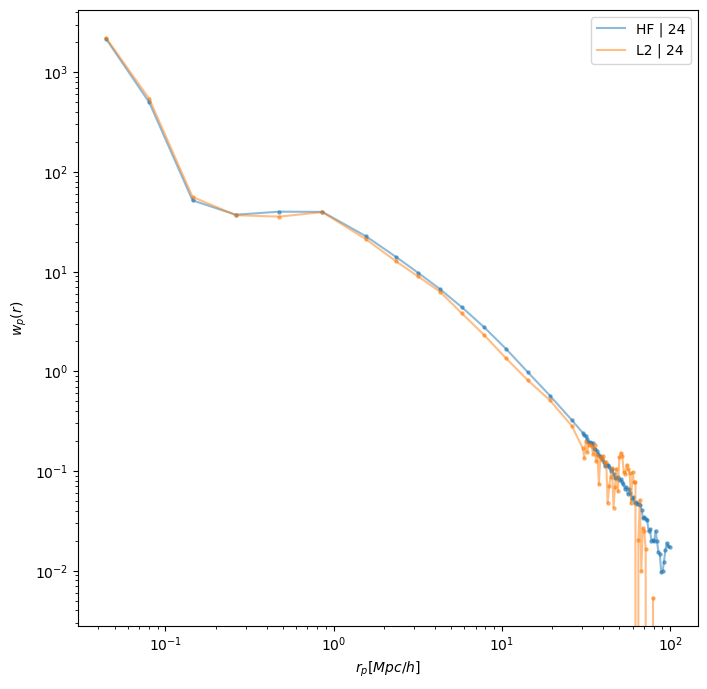

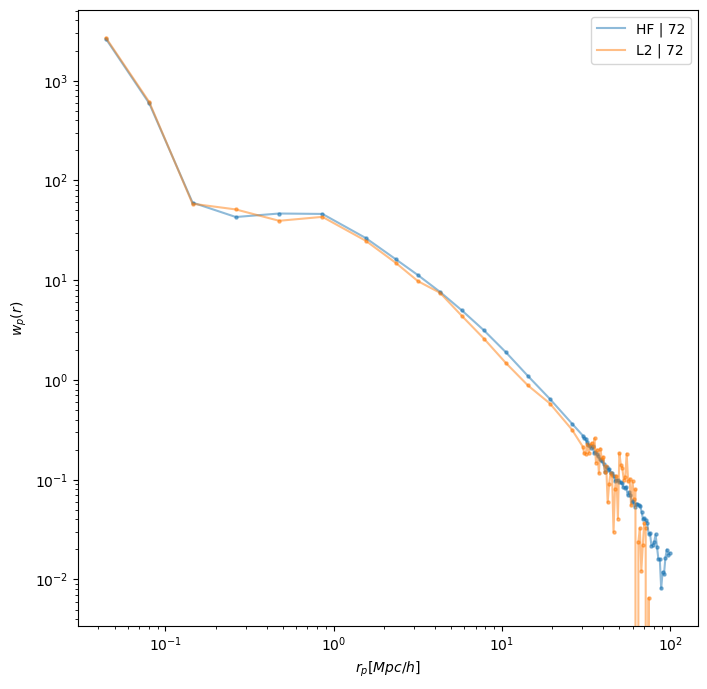

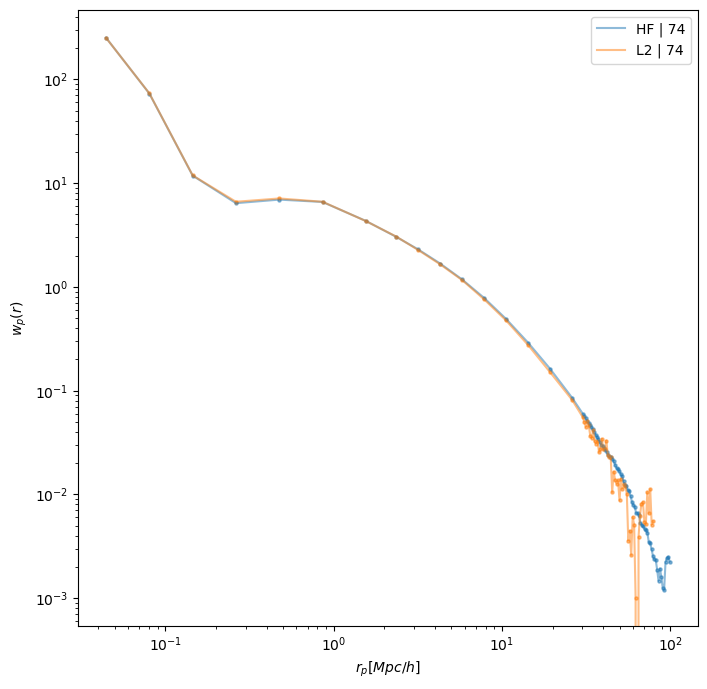

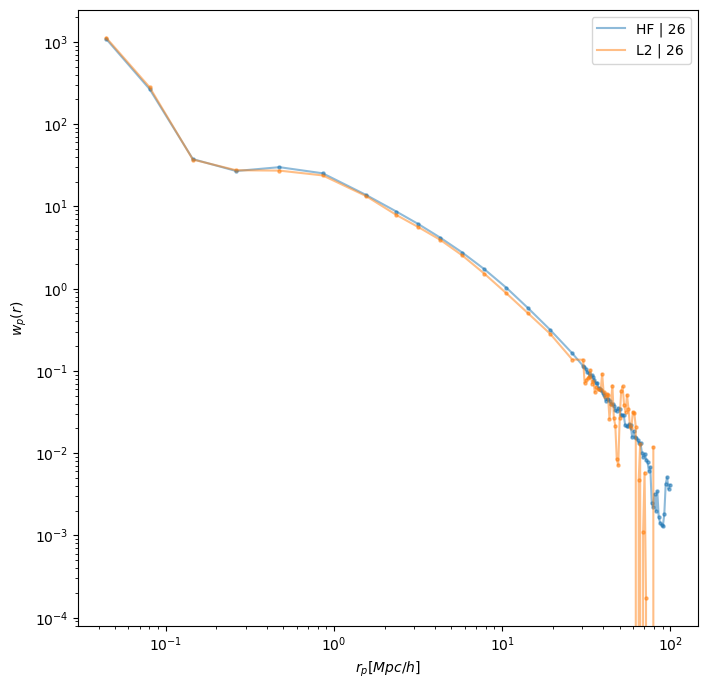

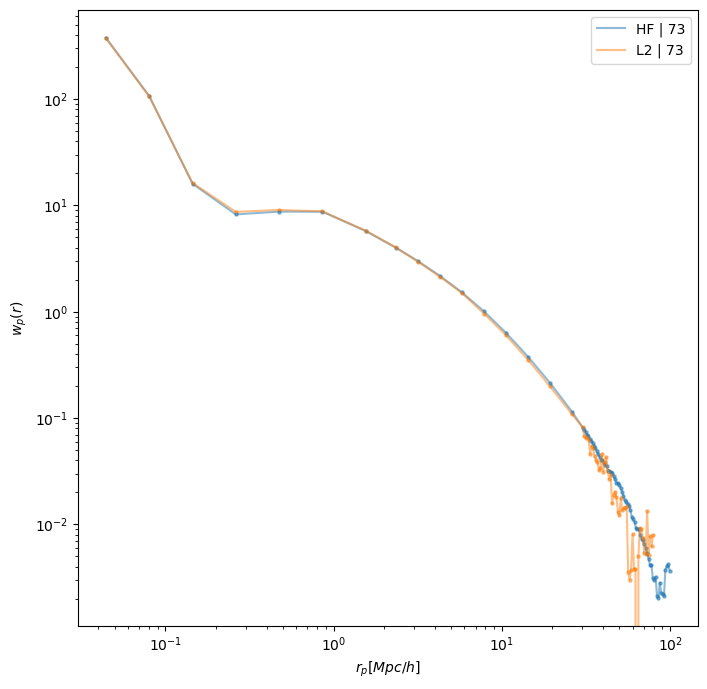

In [1]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/'
print(plot_corr.get_comman_pairs(save_dir))
plot_corr.compare_fidelities(save_dir)

['/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0012.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0074.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0008.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0057.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0068.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0064.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0028.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0141.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250_Part750_0086.hdf5', '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/Zheng07_seeds_cosmo_10p_Box250

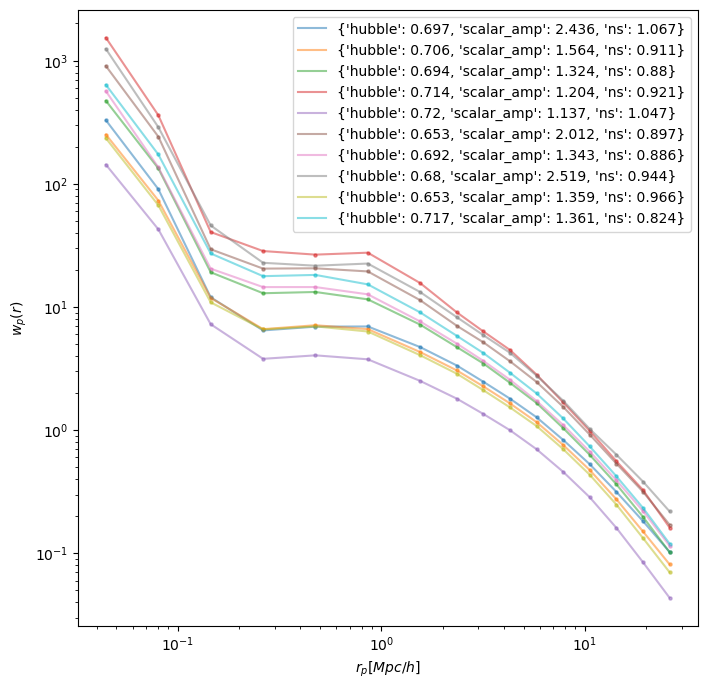

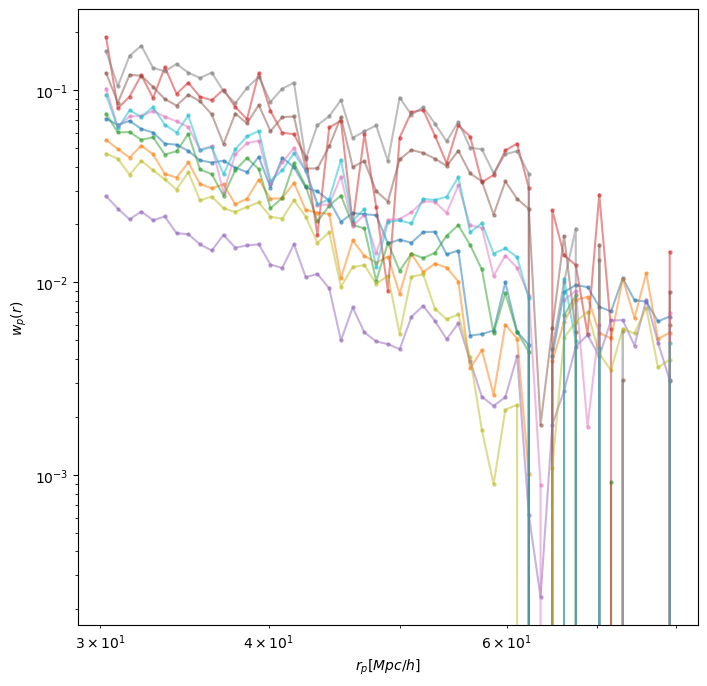

In [7]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/'

l2_corrs = glob(op.join(save_dir, 'Zheng07_seeds_cosmo_10p_Box250_Part750_*' ))[0:10]
print(l2_corrs)
plot_corr.compare_cosmos(l2_corrs, savefig=None, r_range=(0, 30), show_cosmo=True)
plot_corr.compare_cosmos(l2_corrs, savefig=None, r_range=(30, 80))